You expect to have an encrypted message(report) from distant planet (See var_n values in the test file). 

It contains few issues to report on and you should find out :

1) how many issues it contains (themes)

2) label each message to a theme to have brief understanding of what's happening

After some time you receive the correct labels(See 'label' field in the csv file). 

It will be an good practice to compare the results and to make a predictor which will be useful for further labeling

You need to explain how did you found the right amount of clusters, and send out the output of the check functions

Hint:
You may find python libraries like pandas, numpy and sklearn to be quiet useful to solve this task

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Загрузим и посмотрим на данные
data = pd.read_csv('test_data.csv')

In [3]:
data.head()

,Unnamed: 0,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,0,-0.480060,0.176260,0.198378,0.436684,0.172947,0.027392,-0.707964,0.320470,...,-0.302409,-0.297128,-0.096548,0.139542,-0.145355,0.395182,0.082721,0.005400,-0.026441,-0.108023
1,1,0,-0.314651,-0.134033,-0.222847,-0.013558,0.016558,0.365967,-0.552682,-0.000281,...,-0.042050,0.095499,-0.255792,-0.017712,-0.190932,0.082872,0.441845,0.110383,0.031139,0.039577
2,2,0,-0.300815,-0.084558,0.181238,0.005055,0.313164,0.112452,-0.635594,0.402153,...,0.449078,0.534868,-0.110871,-0.540410,-0.421506,0.294148,0.123150,-0.076787,0.126006,0.108019
3,3,0,-0.278396,0.168551,0.179791,0.039391,0.492830,0.185413,-0.388475,0.083588,...,0.159299,0.171783,-0.139541,-0.078331,-0.371579,0.283624,0.286695,0.068057,0.146644,0.114814
4,4,0,-0.252944,0.385547,-0.134255,0.069152,0.197859,0.296981,-0.387140,0.447478,...,-0.090061,-0.092603,-0.152751,-0.058263,-0.283934,0.223888,0.114866,0.059671,-0.033000,-0.073733


In [4]:
#Удалим 1ый столбец с номерами строк
data.drop(data.columns[0], axis=1, inplace=True)

In [5]:
data.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,-0.480060,0.176260,0.198378,0.436684,0.172947,0.027392,-0.707964,0.320470,-0.233182,...,-0.302409,-0.297128,-0.096548,0.139542,-0.145355,0.395182,0.082721,0.005400,-0.026441,-0.108023
1,0,-0.314651,-0.134033,-0.222847,-0.013558,0.016558,0.365967,-0.552682,-0.000281,-0.167029,...,-0.042050,0.095499,-0.255792,-0.017712,-0.190932,0.082872,0.441845,0.110383,0.031139,0.039577
2,0,-0.300815,-0.084558,0.181238,0.005055,0.313164,0.112452,-0.635594,0.402153,-0.439029,...,0.449078,0.534868,-0.110871,-0.540410,-0.421506,0.294148,0.123150,-0.076787,0.126006,0.108019
3,0,-0.278396,0.168551,0.179791,0.039391,0.492830,0.185413,-0.388475,0.083588,-0.186267,...,0.159299,0.171783,-0.139541,-0.078331,-0.371579,0.283624,0.286695,0.068057,0.146644,0.114814
4,0,-0.252944,0.385547,-0.134255,0.069152,0.197859,0.296981,-0.387140,0.447478,-0.432704,...,-0.090061,-0.092603,-0.152751,-0.058263,-0.283934,0.223888,0.114866,0.059671,-0.033000,-0.073733


In [6]:
data.shape

(16, 51)

Видим, что примеров мало.

In [7]:
#Выделим правильные метки
target = data.loc[:, 'target'].to_numpy()

In [8]:
#Выделим фичи
X = data.loc[:, 'var_0':].to_numpy()

Для определения количества кластеров понизим размерность до 2х с помощью PCA и построим точки на плоскости.

In [9]:
from sklearn import decomposition

In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


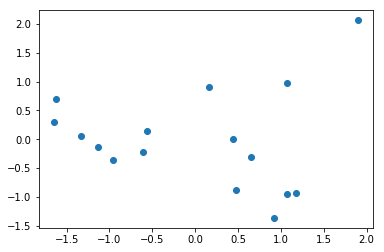

In [11]:
# Уменьшим размерность пространства до 2 с помощью PCA и визуализируем
pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

plt.plot(X_pca[:, 0], X_pca[:, 1], 'o')

Визуально можно выделить 3-4 кластера.

In [12]:
from sklearn.cluster import KMeans

Для определения числа кластеров ещё можно воспользоваться правилом локтя

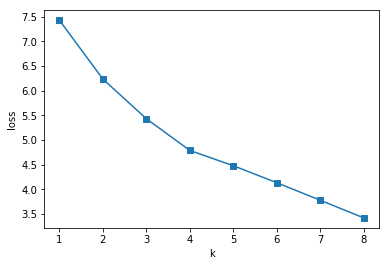

In [13]:
inertia = []
for k in range(1,9):
    clustering = KMeans(n_clusters=k, random_state=42).fit(X)
    inertia.append(np.sqrt(clustering.inertia_))

plt.plot(range(1, 9), inertia, marker='s');
plt.xlabel('k')
plt.ylabel('loss');

Видим, что скорость убывания уже спадает при k = 3. Попробуем применить алгоритм k-means при k = 3.

In [14]:
clustering = KMeans(n_clusters=3).fit(X)

In [15]:
print(target)

[0 0 0 0 0 0 0 0 1 1 1 1 1 2 2 2]


In [16]:
print(clustering.labels_)

[1 1 1 1 1 1 1 2 2 2 2 2 2 0 0 0]


Всего один объект из выборки попадает не в тот кластер. Совсем неплохо :)

In [17]:
from sklearn.metrics import homogeneity_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score, zero_one_loss, classification_report 

def unsupervised_results(predicted_labels_unsupervised, recieved_labels):
    print(homogeneity_score(predicted_labels_unsupervised, recieved_labels))


def accuracy_check(model, x_test, y_test):
#     Load here the model and validation set data to test
    # test accuracy
    y_pred_ts = model.predict(x_test)
    predictions_ts = [round(value) for value in y_pred_ts]
    accuracy2 = accuracy_score(y_test, predictions_ts)
    print("Accuracy on test: %.2f%%" % (accuracy2 * 100.0))
    baccuracy2 = balanced_accuracy_score(y_test, predictions_ts)
    print("Balanced Accuracy on test: %.2f%%" % (baccuracy2 * 100.0))
    z12 = zero_one_loss(y_test, predictions_ts)
    print("Zero One Loss on test: %.2f%%" % (z12 * 100))
    class_rep2 = classification_report(y_test, predictions_ts)
    print(class_rep2)

In [18]:
unsupervised_results(target, clustering.labels_)

0.834988083757


Теперь создадим классификатор. 
Для начала посмотрим на размеченный датасет.

In [19]:
# Уменьшим размерность пространства до 2 с помощью PCA и визуализируем
pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

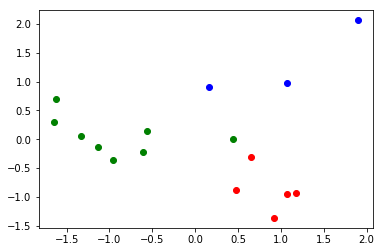

In [20]:
plt.plot(X_pca[target==0, 0], X_pca[target==0, 1], 'go')
plt.plot(X_pca[target==1, 0], X_pca[target==1, 1], 'ro')
plt.plot(X_pca[target==2, 0], X_pca[target==2, 1], 'bo')

Видно, что в целом данные разделимы. Попробуем использовать классификатор kNN. Применим его к данным с пониженной размерностью.

In [21]:
from sklearn import model_selection, neighbors

Разобьем данные на тренировочные и валидацию. Т.к. классы несбалансированы, используем стратификацию.

In [22]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_pca, target, shuffle=True, random_state = 42, test_size=0.3, stratify=target)

Исходя из картинки хорошо должен сработать вообще самый простой 1-NN. Данных у нас мало.

In [29]:
model = neighbors.KNeighborsClassifier(n_neighbors = 1)

Оценим качество с помощью кросс-валидации по 2 фолдам, т.к. есть немногочисленные классы.

In [30]:
model_selection.cross_val_score(estimator=model, X=X_train, y=y_train, cv=2).mean()

0.65000000000000002

Без комментариев :)

In [31]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Посмотрим на предсказания на валидации.

In [32]:
model.predict(X_val)

array([0, 1, 0, 1, 0], dtype=int64)

In [33]:
print(y_val)

[2 1 0 1 0]


In [28]:
accuracy_check(model, X_val, y_val)

Accuracy on test: 80.00%
Balanced Accuracy on test: 83.33%
Zero One Loss on test: 20.00%
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2
           2       1.00      1.00      1.00         1

    accuracy                           0.80         5
   macro avg       0.89      0.83      0.82         5
weighted avg       0.87      0.80      0.79         5

